In [1]:
import pandas as pd
import numpy as np

## Step 1 - Extract Case study

In [2]:
d_publications = {
'Shimojima  et al 2016' : 'https://www.sciencedirect.com/science/article/abs/pii/S1769721216303147?via%3Dihub',
'Cuvertino et al., 2017' :  'https://www.cell.com/ajhg/fulltext/S0002-9297(17)30459-7', # 'https://www.sciencedirect.com/science/article/pii/S0002929717304597',
'Baumann et al 2020' : 'https://onlinelibrary.wiley.com/doi/full/10.1002/humu.23970',
'Palumbo et al, 2018' : 'https://www.sciencedirect.com/science/article/abs/pii/S1769721217307140?via%3Dihub',
'Riviere et al, 2012' : 'https://www.nature.com/articles/ng.1091',
'Verloes et al, 2015.' : 'https://www.nature.com/articles/ejhg201495',
'Procaccio et al, 2006' : 'https://www.cell.com/ajhg/fulltext/S0002-9297(07)63917-2',
'Conboy et al, 2017' : 'https://www.hindawi.com/journals/crig/2017/9184265/',
'Latham et al, 2018' : 'https://doi.org/10.1038/s41467-018-06713-0',
'Cai et al, 2017' : 'https://doi.org/10.1016/j.jid.2017.03.017',
'Nunoi et al, 1999' : 'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC17578/', 
'Ramer et al 1995' : '',
'Bitton et al, 2012' : '',
'Donato et al, 2016' : '',
'Johnston, 2013' : '',
'Sandestig et al, 2018' : '',
'Lee et al, 2018' : 'https://www.spandidos-publications.com/10.3892/mmr.2018.8837',
'Zhu et al, 2003' : '',
'Liu et al, 2008' : '',
'Yuan et al, 2016' : '',
'Miyajima et al, 2020' : 'https://www.nature.com/articles/s41598-020-63690-5', # in text - entity linking
'Miyagawa et al, 2015' : 'https://doi.org/10.1177/0003489415575057',  # paywall
'Rendtorff et al, 2006' : 'https://www.nature.com/articles/5201670',
'Rainger et al, 2017' : 'https://onlinelibrary.wiley.com/doi/full/10.1002/humu.23246',
'Kemerley et al, 2017' : 'https://pubmed.ncbi.nlm.nih.gov/27096712/', # paywall
'Chacon-Camachol, O.F. 2020' : 'https://www.sciencedirect.com/science/article/abs/pii/S1769721219304537?via%3Dihub',
'Park et al, 2013' : 'https://bmcgenomics.biomedcentral.com/articles/10.1186/1471-2164-14-191',
'van Ewijk et al, 2003' : '',
'de Heer et al, 2009' : 'https://journals.sagepub.com/doi/10.1177/000348940911800511',
'Morin et al, 2009' : '',
'Baek et al, 2012' : 'https://ojrd.biomedcentral.com/articles/10.1186/1750-1172-7-60',
}

d_IARS = {
    'Orenstein et al, 2016' : 'https://onlinelibrary.wiley.com/doi/full/10.1111/cge.12930',
    'Fagbemi et al, 2020' : 'https://www.wjgnet.com/1007-9327/full/v26/i15/1841.htm',
    'Kopajtich et al, 2016' : 'https://www.sciencedirect.com/science/article/pii/S0002929716301987?via%3Dihub',
    'Musante et al, 2017' : 'https://onlinelibrary.wiley.com/doi/full/10.1002/humu.23205'
}

URL = d_IARS['Kopajtich et al, 2016']

In [3]:
import urllib.request
import nltk


user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

#URL = d_publications['Cuvertino et al., 2017']

#URL = '' # 12

#cookies = {'required_cookie': required_value}
headers={'User-Agent':user_agent,} 
cookieProcessor = urllib.request.HTTPCookieProcessor()
opener = urllib.request.build_opener(cookieProcessor)

request=urllib.request.Request(URL,None, headers) #The assembled request
response = opener.open(request,timeout=100)
data = response.read() # The data u need

#soup = BeautifulSoup(data, "lxml")

### Javascript compatability
- Science direct uses javascript to request the paper (we need to consider some loading time
- Selenium  (requires browser like Firefox to be installed)
- Make sure it’s in your PATH, e. g., place it in /usr/bin or /usr/local/bin.

In [4]:
import time
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome("C:\Program Files\Chromedriver\chromedriver.exe")

#driver = webdriver.Firefox()
driver.get(URL)
time.sleep(10)
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

driver.quit()

In [1]:
#soup = BeautifulSoup(data, "lxml")#.text


### Import Acronym list  [ NOT USED ]
The acronyms were expanded with respect to the following dictionary: https://www.tabers.com/tabersonline/view/Tabers-Dictionary/767492/all/Medical_Abbreviations

In [67]:
import pickle

a_file = open("preprocessing/acronym_list.pkl", "rb")
d_acronyms = pickle.load(a_file)
a_file.close()

l_del = []

## remove acronyms that only consist of a single character (too ambgious)
for key in d_acronyms.keys():
    if len(key) < 2:
        l_del.append(key)
        
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]
    return the_dict
            
d_acronyms = entries_to_remove(l_del, d_acronyms)

## #1 First Product: Save raw extracted file

In [5]:
import os
import sys
sys.path.append('../')
import DeepPhenotyping_functions as func

title= soup.title.string
title = title[:50].replace(' ', '_')

if not os.path.exists('results/%s' % (title)) : # make new folder
    os.makedirs('results/%s' % (title)) 
    os.makedirs('results/%s/0_raw' % (title)) 
    os.makedirs('results/%s/0_raw/figures' % (title)) 
    os.makedirs('results/%s/0_raw/tables' % (title)) 
    os.makedirs('results/%s/0_raw/supplement' % (title)) 
    os.makedirs('results/%s/1_extractions' % (title)) 
    os.makedirs('results/%s/2_phenotypes' % (title)) 
    os.makedirs('results/%s/3_annotations' % (title))
    
#print(soup)

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\clinphen_src\data\hpo_synonyms.txt


2020-10-15 09:47:31,075 - txt2hpo - INFO - txt2hpo 0.2.2
2020-10-15 09:47:31,151 - txt2hpo - INFO - Using configuration file: \Users\levrex\.txt2hpo\txt2hpo.ini
2020-10-15 09:47:31,472 - phenopy - INFO - checking if config file exists: \Users\levrex\.phenopy
2020-10-15 09:47:31,487 - phenopy - INFO - phenopy 0.4.2
2020-10-15 09:47:31,503 - phenopy - INFO - Using configuration file: \Users\levrex\.phenopy\phenopy.ini
2020-10-15 09:47:52,754 - txt2hpo - INFO - Using scispaCy language model



### 1.1 Identify custom titles 
Search all unique div classes to recognize custom titles

In [6]:
title_classes = func.extract_custom_headers(soup)
print(title_classes)

['u-hide-from-sm publication-title-link u-h3', 'article-dochead', 'section-title u-h4', 'publication-brand-title-link', 'sub-heading', 'download-all-title', 'title-text', 'download-link-title', 'section-title u-h3 u-margin-l-top u-margin-xs-bottom', 'title', 'article-title ellipsis text-s', 'side-panel-header u-margin-s-bottom', 'pps-title']


### 1.2 extract figures, tables and supplement 

Todo: extract suppl. tables from current link (with a class='print-link' / href)

Remove_inc = remove rows with incosistent length (be careful: these can improve readability, or perhaps include valuable information)

In [7]:
import re

from urllib.parse import urlparse

parsed_uri = urlparse(URL)
domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)



In [8]:
import importlib as imp
from urllib.parse import urlparse
imp.reload(func)

tables = soup.findAll("table")

func.save_tables(title, tables, remove_inc=True)
func.extract_figures(soup, title, domain, save_figures=True)
func.extract_supplement(soup, title, domain, save_supplement=True) 

# Get links within table
for index, table in enumerate(tables):
    func.check_for_link(table, domain, index, title) # add this functionality to save tables?

## ONLY APPLY STEPS BELOW if no captions found!! - Otherwise it might overwrite something pre-existing
#func.extract_captions(soup, title)
#func.get_caption_from_link(soup, title, domain )

### 1.3 Extract Main text

1. First make a folder for the output (if it doesnt exist already)
2. Remove all HTML artefacts (maybe capture certain flags)

In [9]:
import re
import os
imp.reload(func)

def expand_acronyms(s, acronyms):
    for k, v in acronyms.items():
        s = s.replace(' ' + k + ' ', v)
    return s

soup = func.remove_html_tags(soup)
new_soup = func.regex_cleaning(str(soup), title_classes)
d_acronyms = func.find_acronyms(new_soup)
print('Acronyms captured: ', d_acronyms)
#new_soup = expand_acronyms(new_soup, d_acronyms)


new_soup = 'DOI: ' + URL + '<br><br>' + new_soup

with open("results/%s/0_raw/Main_text_%s.html" % (title, title), "w", encoding="utf-8") as file:
    file.write(new_soup)

Acronyms captured:  {'NM_002161.5': 'nsAOClinical FeaturescDNA', 'EAW62813.1': 'ein', 'ExAC': 'e Exome Aggregation Consortium', 'BMBF': 'Bildung und Forschung', 'AMED': 'al Research and Development', '2003': '2', '2014': '2014', '2006': '25', 'AIMPs': 'ase-interacting multifunctional proteins', '2010': '25', '2013': '2'}


### 1.4 extract text data from PDF [WIP]
Source: https://medium.com/@umerfarooq_26378/python-for-pdf-ef0fac2808b0

In [ ]:
import PyPDF2
# pdf file object
# you can find find the pdf file with complete code in below
pdfFileObj = open('results/example.pdf', 'rb')
# pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
# number of pages in pdf
print(pdfReader.numPages)
# a page object
pageObj = pdfReader.getPage(0)
# extracting text from page.
# this will print the text you can also save that into String
print(pageObj.extractText())

In [ ]:
import tabula

# readinf the PDF file that contain Table Data
# you can find find the pdf file with complete code in below
# read_pdf will save the pdf table into Pandas Dataframe
df = tabula.read_pdf("results/example.pdf", pages=5)
# in order to print first 5 lines of Table
df.head()
## multiple tables
# df = tabula.read_pdf(“offense.pdf”,multiple_tables=True)

#### Convert pdf table to excel file (csv)

Todo:
- remove \r, \n and \t from column names (otherwise they are split over multiple rows)

In [169]:
# tabula.read_pdf("offense.pdf", area=(126,149,212,462), pages=1) # select AREA

tabula.convert_into("results/example.pdf", "results/example_table5.csv", output_format="csv" , pages=5)

### 1.5 Write performance report

Work in progress

In [16]:
import sys

def write_HTML_report(title, phenotyper, d_checks={}):
    """
    
    
    title = title of article
    
    Generate a HTML report file, which provides a summary of the extraction process.
    
    Highlighting and warning the user for error propagation
    """
    htmFile = open("results/%s/report.html" % (title),"w")
    htmFile.write("""<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
            "http://www.w3.org/TR/html4/loose.dtd">
    <html>
    <head>
        <title>Report - HPO extraction</title>
    </head>
    <body>
        <h1>Report - HPO extraction</h1>
        <hr>
    """)
    d_steps = {0: ['Main Text Extraction', 'Table Extraction', 'Caption Extraction', 'Figure Extraction', 'Supplementary Extraction'], 1:[], 2:[], 3:[] } # bookkeeping which rows consists of which steps
    d_checks = {'Table Extraction': 'Succesful!', 'Supplementary Extraction': 'Failed!', 'Caption Extraction' : ''}
    l_headers = ['<h2>1. Raw</h2>', '<h2>2. First screening</h2>', '<h2>3. Phenotypes</h2>', 
              '<h2>4. Entity linked annotations</h2>']
    
    string = ["Phenotyper: %s" % (phenotyper)]
    
    for i in range(len(d_steps)):
        string.append(l_headers[i])
        for component in d_steps[i]:
            if 'Succes' in d_checks[component]:
                string.append('%s: <b><span style="color:lime">%s</span></b>' % (component, d_checks[component]))
            else :
                string.append('%s: <b><span style="color:red">%s</span></b>' % (component, d_checks[component]))
    
    #string = ["Phenotyper: %s" % (phenotyper), '<h2>1. Raw</h2>', '' % d_checks['tb'], 
    #          ]

    for s in string:
        htmFile.write( "<p> %s</p>" %s)

    htmFile.write("""
    </body>
    </html>""")

    htmFile.close()
    return


d_checks = func.get_checks() # let op -> dit werkt niet als je func steeds reset!!
print(d_checks)
#write_HTML_report(title, phenotyper=pheno, d_checks)

{'Main Text Extraction': '', 'Table Extraction': '', 'Supplementary Extraction': '', 'Caption Extraction': ''}


## #2 Second Product: First screening

- get first interceptions 
- Perform low resolution Clinphen to check locations of phenotypes. (Without typo correction)
- extensive = ?? sec (>5 min)
- quick ( without typo) 1.7 sec

In [12]:
imp.reload(func)
import time
start = time.time()
print("Time elapsed on working...")

items, first_intercept, lines = func.clinphen('results/%s/0_raw/Main_text_%s.html' % (title, title),'data', extensive=False)

end = time.time()
print("Time consumed in working: ",end - start)

df_hpo = pd.DataFrame([n.split('\t') for n in items.split('\n')])
df_hpo.columns = df_hpo.iloc[0]
df_hpo = df_hpo.reindex(df_hpo.index.drop(0))
df_hpo.to_csv('results/%s/2_phenotypes/%s.csv' % (title, title))
df_hpo.head()

Time elapsed on working...
Time consumed in working:  1.5292789936065674


,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier),Example sentence
1,HP:0001399,Hepatic failure,14,21,recurrent acute liver failure due to nbas defi...
2,HP:0001510,Growth delay,12,26,significant growth impairment
3,HP:0001427,Mitochondrial inheritance,10,18,prokischthe mitochondrial proteome database mi...
4,HP:0001511,Intrauterine growth retardation,10,26,p val370gly asn992asp prenatal iugr yes 6 2 mo...
5,HP:0001396,Cholestasis,10,70,p val370gly asn992asp prenatal iugr yes 6 2 mo...


### 2.1 Screening with Reading Frame

In [17]:
import numpy as np
imp.reload(func)

BIN_SIZE = 1 #10
MIN_POWER = 3 #3
FRAMES = 5
parsed_doc = lines
#parsed_doc = [item for sublist in lines for item in sublist] # get parsed text


txt, d_phenotype = func.first_screening(parsed_doc, first_intercept, BIN_SIZE, MIN_POWER, FRAMES)

pheno = 'ncr'
with open("results/%s/1_extractions/Annotated_%s_%s.html" % (title, pheno, title), "w", encoding="utf-8") as file:
    file.write(txt)

#with open("results/%s/1_extractions/Annotated_%s.html" % (title, title), "w", encoding="utf-8") as file:
#    file.write(txt)
    


TypeError: object of type 'int' has no len()

In [ ]:
import matplotlib.pyplot as plt

plt.plot( [i* BIN_SIZE for i in range(len(d_phenotype[4])) ], list(d_phenotype[4]))
plt.ylabel('Phenotype mentions')
plt.xlabel('Relative position in document (parsed)')
plt.show()

## #3 Third Product: Phenotyping

### Choose phenotyper:

In [61]:
phenotypers = ['clinphen', 'txt2hpo', 'ncr']

pheno = phenotypers[2]

### 3.1 Scan Main text

In [62]:
from nltk.tokenize import sent_tokenize
imp.reload(func)
lines = sent_tokenize(new_soup)
print(len(lines))


if pheno == 'ncr':
    first_intercept = func.ncr_str_chunk(lines)
elif pheno == 'clinphen':
    items, first_intercept, lines = func.clinphen_str(new_soup,'data', extensive=False)
    df_hpo = pd.DataFrame([n.split('\t') for n in items.split('\n')])
    df_hpo.columns = df_hpo.iloc[0]
    df_hpo = df_hpo.reindex(df_hpo.index.drop(0))
    inferred = list(df_hpo['HPO ID'])
elif pheno == 'txt2hpo':
    first_intercept = func.txt2hpo_str_chunk(lines)

197


### 3.2 Save intercepted phenotypes

In [63]:
imp.reload(func)
if type(first_intercept) != list:
    ## save annotated text
    new_lines = func.annotate_text(lines, first_intercept)

    with open("results/%s/2_phenotypes/Annotated_%s_%s.html" % (title, pheno, title), "w", encoding="utf-8") as file:
        file.write(' '.join(new_lines))
    
    ## save all found phenotypes
    df_hpo = func.generate_phenotable(first_intercept)
    df_hpo.to_csv("results/%s/3_annotations/Overview_Intercepted_Phenotypes_%s.csv" % (title, pheno), sep='|', index=False)
    df_hpo.head()

### [NOT USED]

In [23]:
items = func.clinphen('example_data.txt','data', extensive=True)

df_hpo = pd.DataFrame([n.split('\t') for n in items.split('\n')])
df_hpo.columns = df_hpo.iloc[0]
df_hpo = df_hpo.reindex(df_hpo.index.drop(0))
df_hpo.head()

,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier),Example sentence
1,HP:0000006,Autosomal dominant inheritance,1,0,townes brocks syndrome tbs is an autosomal dom...
2,HP:0000356,Abnormality of the outer ear,1,2,major findings include external ear anomalies ...
3,HP:0000598,Abnormality of the ear,1,2,major findings include external ear anomalies ...
4,HP:0000365,Hearing impairment,1,3,major findings include external ear anomalies ...
5,HP:0010442,Polydactyly,1,4,major findings include external ear anomalies ...


### 3.3 Scan Tables

scan_table

In [67]:
imp.reload(func)
tab_files = os.listdir("results/%s/0_raw/tables/" % (title))
#index = 0

for tab in tab_files:
    table = pd.read_csv("results/%s/0_raw/tables/%s" % (title, tab), sep='|')
    table = table.fillna('') # very important to fill na prior to function
    
    annotated_table = func.scan_table(table, phenotyper=pheno) #  tables/
    #print(annotated_table)
    annotated_table.to_csv("results/%s/2_phenotypes/Table_%s_%s_%s.csv" % (title, str(index), pheno, title), sep='|', index=False)
    index += 1

Binary columns: ["('Clinical Features', 'Growth Retardation (SDS)a')"]


In [54]:
#annotated_table.head()

## Step 4: Annotations 
1. Recognize 'patient-id' column in table


### Create phenoprofiles based on table

In [68]:
import ast
import numpy as np
imp.reload(func)


d_pat = func.collectPhenoProfiles(title, phenotyper=pheno)
df_pheno = func.getPatientProfileTable(d_pat)
df_pheno.to_csv("results/%s/3_annotations/PhenoProfiles_%s.csv" % (title, pheno), sep='|', index=True)

df_pheno.head()

Patient Identifier column found:  ('ID', 'ID')


,HP:0012443,HP:0000486,HP:0000365,HP:0001399,HP:0010864,HP:0001511,HP:0002342,HP:0002910,HP:0100022,HP:0001999,HP:0100633,HP:0001252,HP:0001250,HP:0001392,HP:0001510,HP:0000819,HP:0001396,HP:0001397,HP:0001344,HP:0000293
#65269 (DEU),1,1,0,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0
#85880 (JPN),0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0
#83921 (AUT),0,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,1,0,1


### Evaluate with validation set
#### Validation IARS

In [69]:
d_IARS_valid = {
    'Fagbemi et al, 2020' : ['validation/021020_1757_HPODP_proj7_art113_pat67-export.html'], 
    'Kopajtich et al, 2016' : ['validation/021020_1758_HPODP_proj7_art92_pat69-export.html',
        'validation/021020_1758_HPODP_proj7_art92_pat70-export.html',
        'validation/021020_1758_HPODP_proj7_art92_pat71-export.html']
}

In [70]:
case_study = 'Kopajtich et al, 2016'

columns = ['Patient', 'ix', 'HPO-id', 'Description', 'assoc genes']
df_valid = pd.DataFrame(columns=columns)

for file_name in d_IARS_valid[case_study]:
    
    with open(file_name, 'r') as f:
        contents = f.read()

        soup = BeautifulSoup(contents, 'lxml')

        tables = soup.findAll("table")

        cnt = 0
        for table in tables:
            if table.findParent("table") is None:
                cnt += 1
        ths = soup.find_all('td')
        pat_id = ths[4].text
        #pat_id = pat_id.split(' ')[0]
        df1, caption = func.parseTable(table)
        df1.columns = ['ix', 'HPO-id', 'Description', 'assoc genes']
        #print(df1)
        print('Patient ', pat_id, ' File Name', file_name)
        df1['Patient'] = [pat_id for i in range(len(df1))]
        #print(df1)
        df_valid = pd.concat([df_tot, df1])
    
df_valid.head()

Patient  #65269 (ID: 69)  File Name validation/021020_1758_HPODP_proj7_art92_pat69-export.html
Patient  #85880 (ID: 70)  File Name validation/021020_1758_HPODP_proj7_art92_pat70-export.html
Patient  #83921 (ID: 71)  File Name validation/021020_1758_HPODP_proj7_art92_pat71-export.html


,Patient,ix,HPO-id,Description,assoc genes
0,#65269 (ID: 69),1,HP:0000152,Abnormality of head or neck,2727
1,#65269 (ID: 69),2,HP:0000234,Abnormality of the head,2705
2,#65269 (ID: 69),3,HP:0000929,Abnormality of the skull,1887
3,#65269 (ID: 69),4,HP:0000240,Abnormality of skull size,1267
4,#65269 (ID: 69),5,HP:0040195,Decreased head circumference,1026


### Get list inferred - with parent features

In [94]:
import spacy
from scispacy import linking
from scispacy.linking import EntityLinker

pheno = 'scispacy'

if pheno == 'scispacy':
    nlp = spacy.load("en_core_sci_sm")

    hpo = linking.EntityLinker(resolve_abbreviations=True, name='hpo') # , name='hpo'

    nlp.add_pipe(hpo)
    
    hpo_to_umls, umls_to_hpo = func.HPO_to_UMLS(graph)

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


### Matching - Text
This matches a bunch of hpo's (these are currently not linked to entities)

In [89]:
#lines

In [102]:
imp.reload(func)

#pheno='txt2hpo'
#pheno='scispacy'
if pheno == 'ncr':
    inferred = df_hpo['hp_id']
elif pheno == 'txt2hpo':
    inferred = df_hpo['hp_id']
elif pheno == 'clinphen':
    inferred = df_hpo['HPO ID']
elif pheno == 'scispacy':
    inferred = func.scispacy_str(nlp, hpo, umls_to_hpo, lines)

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: C

C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_distances[empty_vectors_boolean_flags] = numpy.array(distances)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:283: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  extended_neighbors[empty_vectors_boolean_flags] = numpy.array(neighbors)[:-1]
C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\scispacy\candidate_generation.py:284: VisibleDeprecationWarning: C

In [104]:
#inferred

### Matching - Tables

In [72]:
annotated_table = pd.read_csv("results/%s/3_annotations/PhenoProfiles_%s.csv" % (title, pheno), sep='|')
annotated_table.head()

,Unnamed: 0,HP:0012443,HP:0000486,HP:0000365,HP:0001399,HP:0010864,HP:0001511,HP:0002342,HP:0002910,HP:0100022,...,HP:0100633,HP:0001252,HP:0001250,HP:0001392,HP:0001510,HP:0000819,HP:0001396,HP:0001397,HP:0001344,HP:0000293
0,#65269 (DEU),1,1,0,0,1,1,0,0,1,...,1,1,0,1,1,0,0,0,1,0
1,#85880 (JPN),0,0,1,0,0,1,1,1,0,...,0,0,1,0,1,1,0,1,0,0
2,#83921 (AUT),0,0,0,1,0,1,1,0,0,...,0,1,0,1,1,0,1,1,0,1


FN:  68
FP:  3
#65269 (DEU) 81 145
FN:  45
FP:  3
#85880 (JPN) 49 86
FN:  63
FP:  2
#83921 (AUT) 59 220
Confusion matrix, without normalization
[[ 94 176]
 [  8   0]]
Sensitivity:	 0.35
Specificity:	 0.0
PPV:		 0.92
NPV:		 0.0
F1:		 0.51
Accuracy:	 0.34


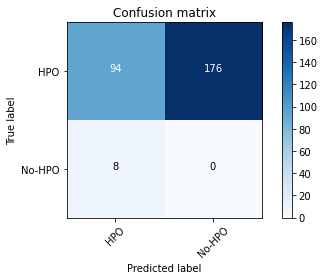

In [73]:
import networkx
import obonet
imp.reload(func)

graph = obonet.read_obo(url)

d_inferred = func.evaluateDictionaryHPO(annotated_table, graph)
cnf_matrix = func.evaluateDictionaryPatients(d_inferred, df_valid, graph)
TP, FP, TN, FN = cnf_matrix[0][0], cnf_matrix[1][0], cnf_matrix[1][1], cnf_matrix[0][1]

plt = func.print_confusion_matrix(cnf_matrix, classes=['HPO', 'No-HPO'], title='Confusion matrix')
func.print_perf(TP, FP, TN, FN)

#### Add parent features - list

In [75]:
import obonet

imp.reload(func)

url = '../phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

new_inferred = []
    
for hpo_id in inferred:
    new_inferred.append(hpo_id)
    df_super = func.get_superclass(graph, id_to_name[hpo_id], name_to_id, id_to_name)
    new_inferred.extend(list(df_super['HPO id']))
#new_inferred


In [81]:
len(set(new_inferred))

118

In [82]:
len(inferred), len(new_inferred)

(538, 5914)

FN:  16
FP:  54
1 4901 121
Confusion matrix, without normalization
[[63 16]
 [54  0]]


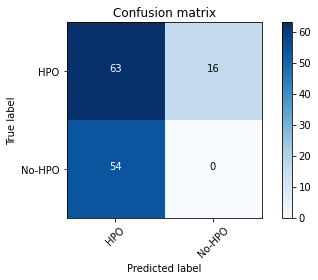

In [83]:
import networkx
import obonet

url = '../phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

d_trans= func.generate_hpo_updgrade_list(graph)

y_test = []
y_pred = []

# set1 - set2 & set2 - set1
TP = 0 
TN = 0
FP = 0
FN = 0

for pat in [1]: # d_pat.keys()
    inferred = new_inferred # d_pat[pat] 
    gold = list(validation_table['HPO-id']) # d_valid[pat]
    inferred = func.is_phenotypic_abnormality(graph, list(inferred))
    gold = func.is_phenotypic_abnormality(graph, list(gold))
    #gold = func.update_deprecated_OBO(list(gold), d_trans)
    #inferred = func.update_deprecated_OBO(list(inferred), d_trans)
    #gold = func.update_deprecated_OBO(list(gold), d_trans)
    TP += len(np.intersect1d(list(set(gold)), list(set(inferred))))
    FN += len(set(gold) - set(inferred))
    FP +=  len(set(inferred) - set(gold))
    
    for i in range(len(np.intersect1d(list(set(gold)), list(set(inferred))))):
        y_test.append(1)
        y_pred.append(1)
    for i in range(len(set(gold) - set(inferred))):
        y_test.append(1)
        y_pred.append(0)
    for i in range(len(set(inferred) - set(gold))):
        y_test.append(0)
        y_pred.append(1)
    #print('TP: ', len(np.intersect1d(list(set(gold)), list(set(inferred)))))
    print('FN: ', len(set(gold) - set(inferred)))
    print('FP: ', len(set(inferred) - set(gold)))
    print(pat, len(inferred), len(gold))
    #y_pred.append(0)
    #y_test.append(0)
    
cnf_matrix = np.array([[TP, FN], [FP, TN]])

plt = func.print_confusion_matrix(cnf_matrix, classes=['HPO', 'No-HPO'], title='Confusion matrix')

### Performance metrics

In [67]:
len(inferred), len(new_inferred)

(4901, 5914)

In [97]:
l = '<table class="default-table glossary"><tbody><tr><td id="G1">2D</td><td>two-dimensional</td></tr><tr><td id="G2">fMLP</td><td>formyl methionyl-leucyl-phenylalanine</td></tr><tr><td id="G3">GST</td><td>glutathione <em>S</em>-transferase</td></tr></tbody></table>'
l = l.split('<')
len(list(set(l)))

16

In [77]:
tables[1]

<table class="default-table glossary"><tbody><tr><td id="G1">2D</td><td>two-dimensional</td></tr><tr><td id="G2">fMLP</td><td>formyl methionyl-leucyl-phenylalanine</td></tr><tr><td id="G3">GST</td><td>glutathione <em>S</em>-transferase</td></tr></tbody></table>

### Entity linking in Main text [ WORK IN PROGRESS ] 
2. ToDo: Link phenotypes to patient Ids in Main text (currently this only works if a case study only concerns 1 patient)

predict entities in main text

- add multiple rules 
- within header, patient 1,

In [ ]:
def get_patprof_main(title, tab_files, d_pat):
    """
    Expand the patient phenotypic profiles with provided table
    """
    with open("results/%s/0_raw/Main_text_%s.html" % (title, title), "r", encoding="utf-8") as file:
        content = f.read()
        #content = 
        #print(table.head())
        cl, pat_identifier = predict_identifier_patient_text(table)
        if pat_identifier:
            print('Patient Identifiers found in text: ', cl)
        else : 
            print("No patient identifiers found, extraction tool assumes phenotypes concern single patient")
        for ix, patient in enumerate(table[cl]):
            key = table['Case ID'].iloc[ix]
            if key in d_pat.keys():
                d_pat[key].extend(ast.literal_eval(table['row_hpo'].iloc[ix]))
            else : 
                d_pat[key] = ast.literal_eval(table['row_hpo'].iloc[ix])
            #print(table['row_hpo'].iloc[ix])
            d_pat[key].extend(ast.literal_eval(table['col_hpo'].iloc[ix]))
            #print(table[['Case ID', 'row_hpo', 'col_hpo']].iloc[ix])
    return d_pat



#### Rule based recognition

Rules to add: 
    1. patient id mentioned in title (subparagraph)
        - potential problems: custom div with different levels (then you want to differentiate)

In [36]:
len(lines)

183

In [47]:
import re

#l_patient = [1]
family_flags = ["cousin", "parent", "mom", "mother", "dad", "father", "grandmother", "grandfather", "grandparent", "family", "brother", "sister", "sibling", "uncle", "aunt", "nephew", "niece", "son", "daughter", "grandchild"]
l_patterns = ['(?:individual|patient|proband|parent)(?:,?)\s([A-z]+\d+)', # combination characters + numbers
              '(?:individual|patient|proband|parent)(?:,?)\s(\#[A-z]*\d+)',  # Hashtags
             '(?:individual|patient|proband|parent)(?:,?)\s([I,V,X]+)', # Roman numbers
             ]
text = 'erojt individual, AC234 and or other individual, ACTG3'
d_patient_ids = {}

ix = 0
# for ix in range(len(lines)):
for pat in l_patterns:
    pattern = re.compile(pat)
    r = pattern.search(text)
    if not r: print("(-1, -1)")
    while r:
        d_match = {}
        #print(pat)
        #print("({0}, {1})".format(r.start(), r.end() - 1))
        d_match['pattern'] = pat
        d_match['matched'] = r.group()
        d_match['start'] = r.start()
        d_match['end'] = r.end() - 1
        d_match['pat_id'] = r.groups()[0]
        if ix in d_patient_ids.keys():
            d_patient_ids[ix].append(d_match)
        else : 
            d_patient_ids[ix] = [d_match]
        r = pattern.search(text,r.start() + 1)
    print(d_patient_ids)

{0: [{'pattern': '(?:individual|patient|proband|parent)(?:,?)\\s([A-z]+\\d+)', 'matched': 'individual, AC234', 'start': 6, 'end': 22, 'pat_id': 'AC234'}, {'pattern': '(?:individual|patient|proband|parent)(?:,?)\\s([A-z]+\\d+)', 'matched': 'individual, ACTG3', 'start': 37, 'end': 53, 'pat_id': 'ACTG3'}]}
